<a href="https://colab.research.google.com/github/JaredDRodriguez/Notebook_PDI_LAB/blob/main/Pr%C3%A1ctica_4_LAB_PDI_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 4.- Segmentación óptima

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize # para algoritmo de optimización

segmentacion sencilla

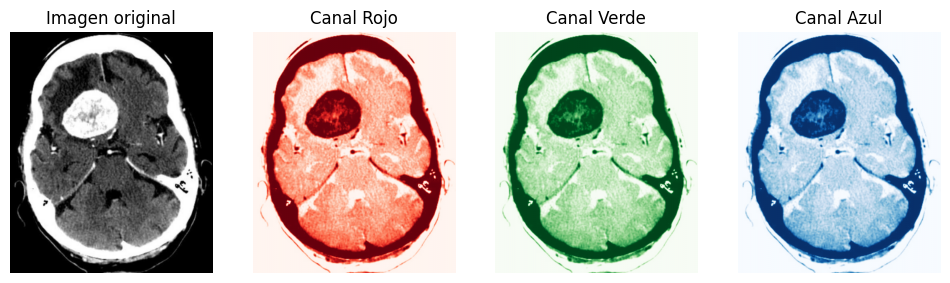

In [ ]:
# Cargar imagen a color
img = cv2.imread('/content/P4I.jpg')  # Cambia 'imagen.jpg' por la ruta de tu imagen
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR (OpenCV) a RGB

# Separar canales
R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]

# Mostrar los canales por separado
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(R, cmap='Reds')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(G, cmap='Greens')
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(B, cmap='Blues')
plt.title('Canal Azul')
plt.axis('off')
plt.show()

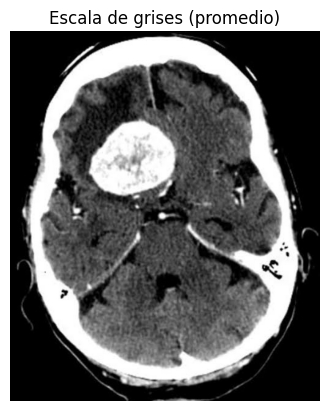

In [ ]:
# Convertir a escala de grises promediando canales
gray_avg = ((R.astype(np.float32) + G + B) / 3).astype(np.uint8)

# Mostrar imagen en escala de grises
plt.imshow(gray_avg, cmap='gray')
plt.title('Escala de grises (promedio)')
plt.axis('off')
plt.show()

Segmentación optima

In [ ]:
# Cargar imagen y convertir de BGR a RGB
img = cv2.imread('/content/P4I.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]


In [ ]:
# Normalizar canales entre 0 y 1
R_norm = R.astype(np.float32) / 255
G_norm = G.astype(np.float32) / 255
B_norm = B.astype(np.float32) / 255



# Función objetivo: varianza negativa (porque minimize() minimiza)
def grayscale_variance(weights):
    w_r, w_g, w_b = weights
    print(weights)
    gray = w_r * R_norm + w_g * G_norm + w_b * B_norm
    gray_normalized = (gray - gray.min()) / (gray.max() - gray.min())
    print(-np.var(gray_normalized))
    return -np.var(gray_normalized)  # Negativo para maximizar

# Restricción: suma de pesos debe ser 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Límites de cada peso: entre 0 y 1
bounds = [(0, 1), (0, 1), (0, 1)]

# Valor inicial
initial_weights = [0.23, 0.1, 0.8]

# Optimización
result = minimize(grayscale_variance, initial_weights, method='SLSQP',
                  bounds=bounds, constraints=constraints)

optimal_weights = result.x
print("Pesos óptimos:", optimal_weights)

[0.23 0.1  0.8 ]
-0.12693976894904577
[0.23000001 0.1        0.8       ]
-0.12693976894904577
[0.23       0.10000001 0.8       ]
-0.12693976894904577
[0.23       0.1        0.80000001]
-0.12693976894904577
[0.18666667 0.05666667 0.75666667]
-0.12693976894904577
Pesos óptimos: [0.18666667 0.05666667 0.75666667]


In [ ]:
grayscale_variance(initial_weights)

np.float32(-0.12693977)

In [ ]:
print("Pesos óptimos:", optimal_weights)

Pesos óptimos: [1.15000000e-01 2.77555756e-17 8.85000000e-01]


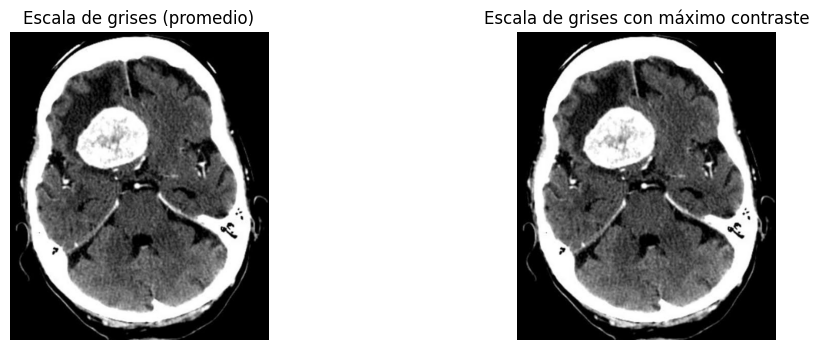

In [ ]:
# Crear imagen en escala de grises con pesos óptimos
gray_optimal = optimal_weights[0] * R_norm + optimal_weights[1] * G_norm + optimal_weights[2] * B_norm
gray_optimal = (gray_optimal * 255).astype(np.uint8)

# Mostrar resultado
# Imagen obtenida de manera directa o sencilla
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_avg, cmap='gray')
plt.title('Escala de grises (promedio)')
plt.axis('off')

# Imagen obtenida de manera óptima
plt.subplot(1, 2, 2)
plt.imshow(gray_optimal, cmap='gray')
plt.title('Escala de grises con máximo contraste')
plt.axis('off')
plt.show()

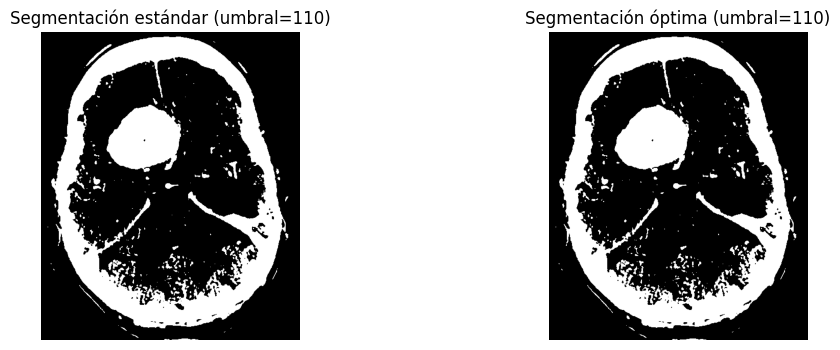

In [ ]:
# Segmentar ambas imágenes con un mismo umbral
umbral = 110

_, seg_standard = cv2.threshold(gray_avg, umbral, 255, cv2.THRESH_BINARY)
_, seg_optimal = cv2.threshold(gray_optimal, umbral, 255, cv2.THRESH_BINARY)

# Mostrar resultado
# Imagen obtenida de manera directa o sencilla
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(seg_standard, cmap='gray')
plt.title(f'Segmentación estándar (umbral={umbral})')
plt.axis('off')

# Imagen obtenida de manera óptima
plt.subplot(1, 2, 2)
plt.imshow(seg_optimal, cmap='gray')
plt.title(f'Segmentación óptima (umbral={umbral})')
plt.axis('off')
plt.show()

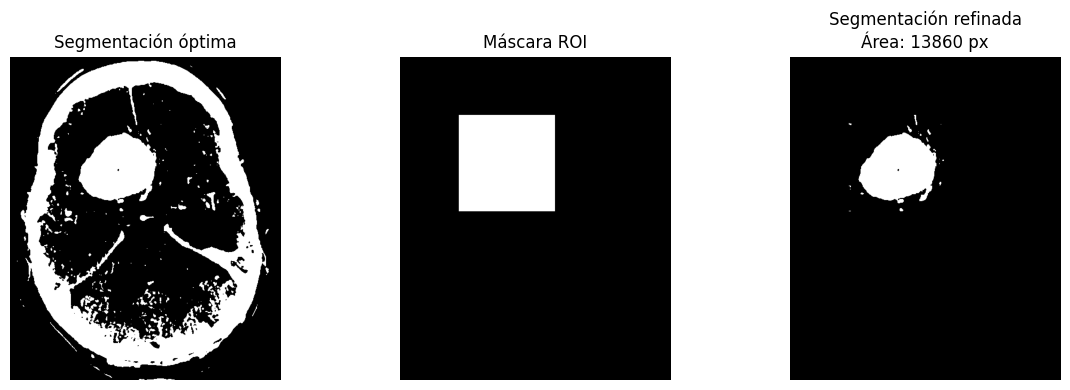

In [ ]:

# Supongamos que ya tienes seg_optimal y quieres definir una región rectangular (ROI)
# Por ejemplo: región rectangular desde (x1, y1) hasta (x2, y2)
x1, y1 = 110, 110
x2, y2 = 290, 290

# Crear una máscara del mismo tamaño que seg_optimal
mask = np.zeros_like(seg_optimal, dtype=np.uint8)
mask[y1:y2, x1:x2] = 255  # La región de interés es blanca (activa)

# Aplicar operación booleana AND
refined_seg = cv2.bitwise_and(seg_optimal, mask)

# Calcular el área en píxeles
area_refinada = np.sum(refined_seg == 255)

# Mostrar resultados
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(seg_optimal, cmap='gray')
plt.title('Segmentación óptima')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Máscara ROI')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(refined_seg, cmap='gray')
plt.title(f'Segmentación refinada\nÁrea: {area_refinada} px')
plt.axis('off')

plt.tight_layout()
plt.show()